In [1]:
from clustering_driver import *

In [ ]:
def search_level_tree(node_list, data_list, T):
    nearest_level_clusters = level_order_search(node_list, T)
    totsum = 0
    for level in nearest_level_clusters:
        minsum = 0
        for cluster_id in level:
            nn = 0
            min_dist = float("inf")
            for i in node_list[cluster_id].data_refs:
                dist = custom_distance(node_list[i].val, T)
                if dist < min_dist:
                    nn = i
                    min_dist = dist
            minsum += min_dist
        totsum += minsum
    return totsum


def search_level_tree_associations(node_list, data_list, input_list):
    """
    Computes matches using tree-based nearest neighbor search.

    Args:
        node_list (list of ClusterTreeNode): List of nodes representing a search tree structure.
        data_list (list of DatumT): List of data points for comparison.
        input_list (list of DatumT): List of input points to find matches for.

    Returns:
        di_match (list of ints): List of indices representing nearest neighbors found in the search tree.
        ds_match (list of floats): List of corresponding distances to nearest neighbors.
    """
    di_match_indices = []
    ds_match_distances = []

    start_time = time.perf_counter()
    totsums = []
    # For each input point in the input list
    for input_index, input_point in enumerate(input_list):
        # Search the tree to find nearest neighbor and distance
        totsum = search_level_tree(node_list, data_list, input_point)

    end_time = time.perf_counter()
    time_to_locate = end_time - start_time
    print(time_to_locate)
    # logger.info("{}".format(time_to_locate))
    # print("Time taken for tree-based search:", time_to_locate)

    return

In [12]:
from clustering_driver import *
n,d,p = tree_loader("sklearn_radius_tree_hierarchy.json")

In [14]:
from collections import deque

q = deque()

q.append(0)
q.append(None)
level = 0
lr = [f"level,width"]
node_count = 0
while len(q) and q[0] != None:
  # q.append(None)
  while q[0] != None:
    node_count +=1
    node = n[q.popleft()]
    lr.append(f"{level},{node.cluster_radius}")
    print(lr[-1])
    if node.children != None and len(node.children):
      print(node.children)
      for c in node.children:
        q.append(c)
  q.popleft()
  if len(q):
    q.append(None)
  print(node_count)
  level +=1

f = open("stats.csv","w")
f.write(",\n".join(lr))
f.close()
    
    
    
    
    
  
  
  

0,8.061756134033203
[1, 2, 3]
1
1,3.2613415718078613
[4, 5, 6]
1,2.7862677574157715
[7, 8, 9]
1,2.763024091720581
[10, 11, 12]
4
2,2.013047456741333
[13, 14, 15]
2,1.518221378326416
[16, 17, 18]
2,1.7142517566680908
[19, 20, 21]
2,1.655248761177063
[22, 23, 24]
2,1.7130476236343384
[25, 26, 27]
2,1.0681202411651611
[28, 29, 30]
2,1.52225661277771
[31, 32, 33]
2,1.6831016540527344
[34, 35, 36]
2,1.17760169506073
[37, 38, 39]
13
3,1.1973751783370972
[40, 41, 42]
3,0.9253751635551453
[43, 44, 45]
3,1.1121355295181274
[46, 47, 48]
3,0.9511989951133728
[49, 50, 51]
3,0.5696278810501099
[52, 53, 54]
3,0.8275195360183716
[55, 56, 57]
3,0.7669760584831238
[58, 59, 60]
3,1.0592674016952515
[61, 62, 63]
3,0.8814405202865601
[64, 65, 66]
3,0.7014902234077454
[67, 68, 69]
3,1.0821261405944824
[70, 71, 72]
3,0.80242520570755
[73, 74, 75]
3,0.74680495262146
[76, 77, 78]
3,0.8980500102043152
[79, 80, 81]
3,1.0777995586395264
[82, 83, 84]
3,0.5133655071258545
[85, 86, 87]
3,0.6814729571342468
[88, 89,

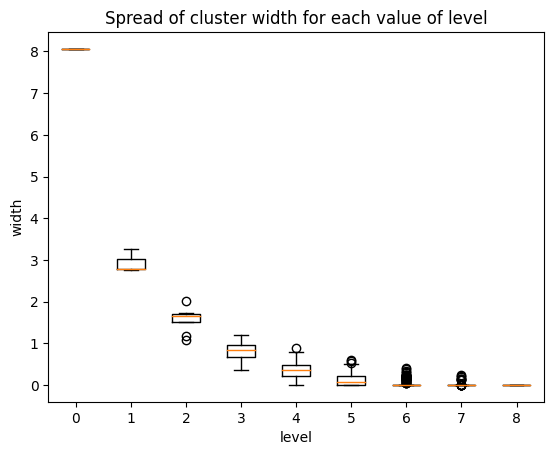

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('stats.csv')

# Group the data by unique values in col1 and collect the corresponding values in col2
grouped_data = [df.loc[df['level'] == value, 'width'].values for value in df['level'].unique()]

# Plotting a box plot
plt.boxplot(grouped_data, labels=df['level'].unique())
plt.title('Spread of cluster width for each value of level')
plt.xlabel('level')
plt.ylabel('width')
plt.show()


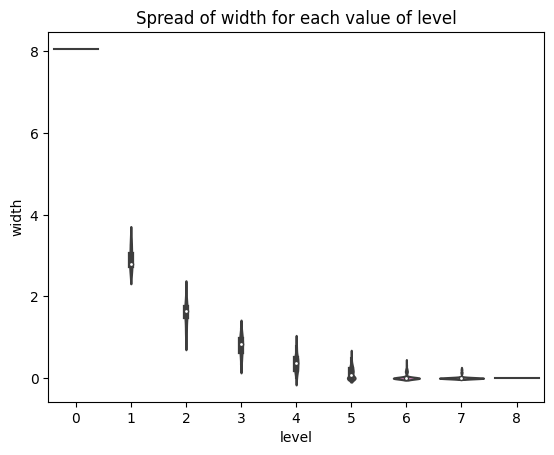

In [19]:
import seaborn as sns

# Use seaborn for a violin plot
# f = open("w")
sns.violinplot(x='level', y='width', data=df)
plt.title('Spread of width for each value of level')
plt.xlabel('level')
plt.ylabel('width')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Read the CSV file into a DataFrame
# df = pd.read_csv('data.csv')

# Extract the values from the two columns
col1 = df['level']
col2 = df['width']

# Fit a polynomial of degree N to the data
degree = 2  # Adjust the degree as needed
coefficients = np.polyfit(col1, col2, degree)

# Create a polynomial function using the coefficients
poly_function = np.poly1d(coefficients)

# Generate x values for the fitted curve
x_fit = np.linspace(min(col1), max(col1), 100)

# Compute the corresponding y values using the polynomial function
y_fit = poly_function(x_fit)

# Plotting the original data
plt.scatter(col1, col2, label='Original Data')

# Plotting the fitted polynomial
plt.plot(x_fit, y_fit, label=f'Polyfit Degree {degree}', color='red')

plt.title('Polynomial Fit')
plt.xlabel('col1')
plt.ylabel('col2')
plt.legend()
plt.grid(True)
plt.show()
